# Klasifikasi Penjualan

Proyek ini bertujuan untuk membangun model klasifikasi penjualan berdasarkan data yang diperoleh dari PT. Ritel Sejahtera, sebuah perusahaan ritel terkemuka di Indonesia yang berfokus pada penjualan produk konsumen.

Dengan menggunakan data ini, proyek ini akan mengidentifikasi pola dan karakteristik yang menentukan jenis barang yang terjual, yang nantinya dapat membantu perusahaan dalam pengambilan keputusan strategis, seperti optimasi stok, pemasaran yang lebih tepat sasaran, dan peningkatan pengalaman pelanggan. Analisis ini diharapkan memberikan wawasan mendalam mengenai perilaku penjualan di berbagai wilayah dan kategori barang.

Mari kita mulai tugas ini dengan mengimpor pustaka (library) Python dan kumpulan data (dataset) yang diperlukan.



In [1]:

# Import library yang diperlukan

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix


### **J.62DMI00.001.1 - Mengumpulkan Data**

Mengumpulkan dataset tentang daftar/tabel penjualan.

PT. Ritel Sejahtera adalah perusahaan ritel terkemuka di Indonesia yang mengkhususkan diri dalam penjualan produk konsumen. Penjualan produk dari sebuah perusahaan ritel. Dataset ini memiliki 78 baris data dengan kolom-kolom sebagai berikut:

1. No. Invoice
2. Tgl_Invoice
3. KodePelanggan
4. Nama Pelanggan
5. Alamat
6. Kota
7. Provinsi
8. Sales
9. KanReg
10. Tgl_Kirim
11. Ekspedisi
12. Kategori Barang
13. Jenis Barang
14. Jumlah
15. Harga
16. Total
17. TW

In [2]:
# Load dataset

file_path = 'Data_Penjualan_Barang.txt'
data = pd.read_csv(file_path, sep=';')

### **J.62DMI00.010.1 - Menentukan Label Data**

In [3]:
# Menampilkan nama kolom (features atau variabel)

print(data.columns)

Index(['No. Invoice', 'Tgl_Invoice', 'KodePelanggan', 'Nama Pelanggan',
       'Alamat', 'Kota', 'Provinsi', 'Sales', 'KanReg', 'Tgl_Kirim',
       'Ekspedisi', 'Kategori Barang', 'Jenis Barang', 'Jumlah', 'Harga',
       'Total', 'TW'],
      dtype='object')


### **J.62DMI00.007.1 - Menentukan Objek Data**

In [4]:
# Menampilkan data 5 baris teratas

print(data.head())

   No. Invoice Tgl_Invoice  KodePelanggan    Nama Pelanggan  \
0          256  05/01/2018             23    Captain Marvel   
1          905  07/01/2018             68         Captain N   
2          492  27/01/2018             76  Captain Universe   
3          602  06/02/2018             58           Aquaman   
4          158  20/02/2018             41            Airboy   

               Alamat        Kota   Provinsi    Sales      KanReg   Tgl_Kirim  \
0      Jl. Jambu mede   Mojokerto      Jatim    Mawar        Jawa  06/01/2018   
1  Jl. Jambu semarang    Pasuruan      Jatim     Lily        Jawa  08/01/2018   
2     Jl. Jeruk besar  Singkawang     Kalbar    Mawar  Kalimantan  28/01/2018   
3          Jl. Bacang     Cilegon     Banten  Jasmine        Jawa  07/02/2018   
4          Jl. Binjai   Gorontalo  Gorontalo   Melati    Sulawesi  21/02/2018   

  Ekspedisi Kategori Barang Jenis Barang  Jumlah    Harga       Total  TW  
0       JNE         Perabot   Meja Makan       1  2211000 

In [5]:
# Informasi umum tentang dataset

print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No. Invoice      77 non-null     int64  
 1   Tgl_Invoice      77 non-null     object 
 2   KodePelanggan    77 non-null     int64  
 3   Nama Pelanggan   77 non-null     object 
 4   Alamat           77 non-null     object 
 5   Kota             77 non-null     object 
 6   Provinsi         77 non-null     object 
 7   Sales            74 non-null     object 
 8   KanReg           77 non-null     object 
 9   Tgl_Kirim        77 non-null     object 
 10  Ekspedisi        77 non-null     object 
 11  Kategori Barang  75 non-null     object 
 12  Jenis Barang     77 non-null     object 
 13  Jumlah           77 non-null     int64  
 14  Harga            73 non-null     object 
 15  Total            73 non-null     float64
 16  TW               77 non-null     int64  
dtypes: float64(1), int

In [6]:
# data['Harga'] = pd.to_numeric(data['Harga'], errors='coerce')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
print(data)

    No. Invoice Tgl_Invoice  KodePelanggan        Nama Pelanggan  \
0           256  05/01/2018             23        Captain Marvel   
1           905  07/01/2018             68             Captain N   
2           492  27/01/2018             76      Captain Universe   
3           602  06/02/2018             58               Aquaman   
4           158  20/02/2018             41                Airboy   
5           624  23/02/2018             74             Astro Boy   
6           224  07/03/2018             52             Comet Man   
7           880  11/03/2018              7               Chamber   
8           588  15/03/2018             23         Captain Video   
9           513  15/03/2018              6              Deathlok   
10          127  27/03/2018             30               Airmale   
11          520  27/03/2018             17              Colossus   
12          194  28/03/2018             52       Captain America   
13          590  05/04/2018             29      

Terlihat masih ada masalah di data ini sebagai berikut:
1. Beberapa kolom yang mengandung nilai kosong/null (proses ini sub bab Membersihkan data)
2. Kolom 'Harga' tipe data nya berupa object. Kita cek data mana yang membuat kolom 'harga' menjadi object
3. Ada dua baris data yang tertukar antara kolom kategori barang dan tgl kirim
4. Ada beberapa baris data yang tertukar antara kolom sales dan Kanreg

Pada kolom harga terdapat data yang termasuk object seperti 2juta. Kita ubah data tersebut menjadi data numerik.

In [7]:
# Mengatasi data object
def convert_harga(harga):
    if pd.isna(harga):  # Jika harga adalah NaN, biarkan apa adanya
        return harga
    if isinstance(harga, str):
        harga = harga.replace('juta', '').strip()  # Hapus kata 'juta' dan spasi
    try:
        harga = int(harga)
        if harga <= 9:  # Jika digit kurang dari atau sama dengan 1 (angka tunggal)
            harga *= 1000000  # Kalikan dengan 1.000.000
    except ValueError:
        return None  # Jika konversi gagal, kembalikan None
    return harga

# Terapkan fungsi pada kolom Harga
data['Harga'] = data['Harga'].apply(convert_harga)

Data object sudah diubah menjadi data numerik. Mari kita cek kembali tipe data nya

In [8]:
# Informasi umum tentang dataset

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No. Invoice      77 non-null     int64  
 1   Tgl_Invoice      77 non-null     object 
 2   KodePelanggan    77 non-null     int64  
 3   Nama Pelanggan   77 non-null     object 
 4   Alamat           77 non-null     object 
 5   Kota             77 non-null     object 
 6   Provinsi         77 non-null     object 
 7   Sales            74 non-null     object 
 8   KanReg           77 non-null     object 
 9   Tgl_Kirim        77 non-null     object 
 10  Ekspedisi        77 non-null     object 
 11  Kategori Barang  75 non-null     object 
 12  Jenis Barang     77 non-null     object 
 13  Jumlah           77 non-null     int64  
 14  Harga            73 non-null     float64
 15  Total            73 non-null     float64
 16  TW               77 non-null     int64  
dtypes: float64(2), int

Sekarang kita lanjut ke point ketiga. Menukar data yang tertukar pada kolom 'Tgl Kirim' dan 'Kategori Barang'

In [9]:
# Fungsi untuk memeriksa apakah nilai di kolom adalah tanggal
def is_date(value):
    try:
        pd.to_datetime(value, errors='raise')
        return True
    except:
        bulan = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
                 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']
        if isinstance(value, str) and value.strip() in bulan:
            return True
        return False

# Identifikasi baris yang tertukar
mask_tgl_kirim = ~data['Tgl_Kirim'].apply(is_date)  # Baris salah di kolom Tanggal Kirim
mask_kategori = data['Kategori Barang'].apply(is_date)  # Baris salah di kolom Kategori Barang

# Tukar nilai yang tertukar
data.loc[mask_tgl_kirim, ['Tgl_Kirim', 'Kategori Barang']] = \
    data.loc[mask_tgl_kirim, ['Kategori Barang', 'Tgl_Kirim']].values

print(data)

<ipython-input-9-ae6d0306b14d>:4: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  pd.to_datetime(value, errors='raise')


    No. Invoice Tgl_Invoice  KodePelanggan        Nama Pelanggan  \
0           256  05/01/2018             23        Captain Marvel   
1           905  07/01/2018             68             Captain N   
2           492  27/01/2018             76      Captain Universe   
3           602  06/02/2018             58               Aquaman   
4           158  20/02/2018             41                Airboy   
5           624  23/02/2018             74             Astro Boy   
6           224  07/03/2018             52             Comet Man   
7           880  11/03/2018              7               Chamber   
8           588  15/03/2018             23         Captain Video   
9           513  15/03/2018              6              Deathlok   
10          127  27/03/2018             30               Airmale   
11          520  27/03/2018             17              Colossus   
12          194  28/03/2018             52       Captain America   
13          590  05/04/2018             29      

Sekarang kita selesaikan masalah point ke 4, yaitu kolom sales dan kanreg tertukar. Kita cek terlebih dahulu nilai unik yang terdapat pada sales

In [10]:
# Menampilkan semua nilai unik di kolom 'Sales'
sales_unik = data['Sales'].unique()

# Menampilkan hasilnya
print(sales_unik)

# Menampilkan semua nilai unik di kolom 'Sales'
sales_unik = data['KanReg'].unique()

# Menampilkan hasilnya
print(sales_unik)

['Mawar' 'Lily' 'Jasmine' 'Melati' 'Dahlia' nan 'Sulawesi' 'Sumatera'
 'Jawa']
['Jawa' 'Kalimantan' 'Sulawesi' 'Sumatera' 'Mawar' 'Dahlia']


In [11]:
# Daftar valid untuk Sales
valid_sales = ['Mawar', 'Lily', 'Jasmine', 'Melati', 'Dahlia']
valid_kanreg = ['Jawa', 'Kalimantan', 'Sulawesi', 'Sumatera']

# Fungsi validasi untuk Sales
def is_valid_sales(value):
    return value in valid_sales

def is_valid_kanreg(value):
    return value in valid_kanreg

# Identifikasi baris yang tertukar
mask_sales_invalid = ~data['Sales'].apply(is_valid_sales)  # Baris salah di kolom Sales
mask_kanreg_invalid = ~data['KanReg'].apply(is_valid_kanreg)  # Baris salah di kolom Kanreg

# Baris yang tertukar (Sales tidak valid, tetapi Kanreg valid)
valid_swap = mask_sales_invalid & mask_kanreg_invalid

# Tukar nilai yang valid
data.loc[valid_swap, ['Sales', 'KanReg']] = \
    data.loc[valid_swap, ['KanReg', 'Sales']].values

print(data)

    No. Invoice Tgl_Invoice  KodePelanggan        Nama Pelanggan  \
0           256  05/01/2018             23        Captain Marvel   
1           905  07/01/2018             68             Captain N   
2           492  27/01/2018             76      Captain Universe   
3           602  06/02/2018             58               Aquaman   
4           158  20/02/2018             41                Airboy   
5           624  23/02/2018             74             Astro Boy   
6           224  07/03/2018             52             Comet Man   
7           880  11/03/2018              7               Chamber   
8           588  15/03/2018             23         Captain Video   
9           513  15/03/2018              6              Deathlok   
10          127  27/03/2018             30               Airmale   
11          520  27/03/2018             17              Colossus   
12          194  28/03/2018             52       Captain America   
13          590  05/04/2018             29      

Keempat masalah sudah diatas mari kita lanjut ke proses selanjutnya

Karena kolom yang ada di dataset tidak digunakan semua, selanjutnya saya akan memilih dataset mana saja yang akan digunakan. Dalam kasus ini, saya hanya memilih kolom 'Jumlah', 'Harga', 'Total', 'Kategori Barang','Jenis Barang'

In [12]:
#Menetukan kolom yang dipilih
selected_coloms = ['TW', 'Provinsi','Sales','Jumlah','Harga','Total','Jenis Barang','Kategori Barang']

df = data[selected_coloms]

### **J.62DMI00.005.1 - Menelaah Data**
Melakukan eksplorasi data untuk memahami pola jumlah, harga, total, dll.

Visualisasi data untuk melihat hubungan antara produksi dan variabel-variabel lainnya.

Sekarang mari kita lihat apakah data tersebut memiliki nilai yang hilang (missing values) atau tidak:

In [13]:
df.isnull().sum()

,0
TW,0
Provinsi,0
Sales,3
Jumlah,0
Harga,4
Total,4
Jenis Barang,0
Kategori Barang,2


Data memiliki nilai yang hilang di beberapa kolom kategorikal dan beberapa kolom numerik. Mari kita lihat statistik deskriptif kumpulan data sebelum mengisi nilai yang hilang:

In [14]:
# Menampilkan statistik deskriptif

print(df.describe())

              TW     Jumlah         Harga         Total
count  77.000000  77.000000  7.300000e+01  7.300000e+01
mean    2.779221   4.883117  3.673274e+06  1.800789e+07
std     1.083651   2.752865  9.264653e+05  1.099343e+07
min     1.000000   1.000000  2.000000e+06  2.211000e+06
25%     2.000000   3.000000  2.928000e+06  8.876000e+06
50%     3.000000   5.000000  3.756000e+06  1.735200e+07
75%     4.000000   8.000000  4.439000e+06  2.511200e+07
max     4.000000   9.000000  4.995000e+06  4.437000e+07


### **J.62DMI00.008.1 - Membersihkan Data**

Mengisi nilai yang hilang jika ada, misalnya dengan menggunakan nilai mean, median atau modus.

Menghapus data yang tidak relevan atau outlier yang ekstrim.



Sekarang mari kita isi nilai yang hilang. Pada kolom kategorikal, yang mengandung nilai kosong yaitu kolom 'Kategori Barang' dan 'Sales'. Kita bisa mengisi nilai tersebut dengan data modus atau data yang sering muncul

In [15]:
# Mengisi nilai NaN dengan modus dari kolom Sales
df['Sales'].fillna(df['Sales'].mode()[0], inplace=True)

<ipython-input-15-087a0b4f69ee>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sales'].fillna(df['Sales'].mode()[0], inplace=True)
<ipython-input-15-087a0b4f69ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales'].fillna(df['Sales'].mode()[0], inplace=True)


Selanjutnya kolom 'Kategori Barang'. Kita sesuaikan kategori barang dengan jenis barang yang sudah ada, agar tidak ada resiko pola data menjadi rusak. Cek nilai unik yang terdapat kolom 'Kategori Barang' dan 'Jenis Barang'

In [16]:
# Menampilkan semua nilai unik di kolom 'Kategori Barang' dan 'Jenis Barang'
kategori_unik = df['Kategori Barang'].unique()
jenis_unik = df['Jenis Barang'].unique()

# Menampilkan hasilnya
print(kategori_unik)
print(jenis_unik)

['Perabot' 'Gadget' 'Elektronik' nan]
['Meja Makan' 'Kursi Makan' 'HP Apple' 'Mesin Cuci' 'Meja Tamu'
 'Kursi Tamu' 'HP LG' 'HP Oppo' 'Lampu Taman' 'AC' 'Tablet' 'Dispenser'
 'HP Samsung' 'TV' 'Kulkas']


In [17]:
# Definisikan fungsi untuk mengganti kategori berdasarkan jenis barang
def categorize_jenis(jenis_barang):
    if 'hp' in jenis_barang.lower() or 'tablet' in jenis_barang.lower():
        return 'Gadget'
    elif 'tv' in jenis_barang.lower() or 'ac' in jenis_barang.lower() or \
         'kulkas' in jenis_barang.lower() or 'dispenser' in jenis_barang.lower() or \
         'mesin cuci' in jenis_barang.lower():
        return 'Elektronik'
    elif 'meja' in jenis_barang.lower() or 'kursi' in jenis_barang.lower() or 'lampu' in jenis_barang.lower():
        return 'Perabot'
    else:
        return 'Lainnya'  # Kategori default jika tidak cocok

# Terapkan logika ke kolom 'Kategori Barang' berdasarkan kolom 'Nama Barang' untuk mengisi nilai NaN pada kolom 'Kategori Barang'
df['Kategori Barang'] = df['Kategori Barang'].fillna(df['Jenis Barang'].apply(categorize_jenis))


<ipython-input-17-2e221a921ca8>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kategori Barang'] = df['Kategori Barang'].fillna(df['Jenis Barang'].apply(categorize_jenis))


Selanjutnya kita isi nilai kosong pada kolom harga dan total harga. Harga sudah disesuaikan dengan jenis barang jadi kita tidak bisa sembarangan mengisi nilai tersebut. Jadi kita isi dengan nilai rata-rata menyesuaikan jenis barangnya

In [18]:
# Menghitung rata-rata harga berdasarkan jenis barang
mean_prices = df.groupby('Jenis Barang')['Harga'].mean()

# Mengisi nilai Harga yang kosong dengan rata-rata sesuai jenis barang
df['Harga'] = df.apply(
    lambda row: mean_prices[row['Jenis Barang']] if pd.isna(row['Harga']) else row['Harga'],
    axis=1
)

<ipython-input-18-968914cbadd8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Harga'] = df.apply(


Kita isi kolom total harga menyesuaikan perkalian jumlah barang dan harganya

In [19]:
# Mengisi nilai kosong pada kolom 'Total Harga' dengan perkalian 'Jumlah' dan 'Harga'
df['Total'] = df.apply(
    lambda row: row['Jumlah'] * row['Harga'] if pd.isna(row['Total']) else row['Total'],
    axis=1
)

<ipython-input-19-4e0e1d2dbfb9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total'] = df.apply(


### **J.62DMI00.006.1 - Memvalidasi Data**
Memeriksa integritas data untuk memastikan tidak ada nilai yang hilang atau tidak valid.

In [20]:
# Memeriksa missing values

print(df.isnull().sum())

TW                 0
Provinsi           0
Sales              0
Jumlah             0
Harga              0
Total              0
Jenis Barang       0
Kategori Barang    0
dtype: int64


Terlihat tidak ada data yang bernilai null atau Nan

## Analisis Data Eksploratori



Mari kita lihat tren penjualan triwulan bedasarkan kategori barang

In [21]:
# Agregasi data penjualan berdasarkan triwulan dan kategori barang
quarterly_sales = df.groupby(['TW', 'Kategori Barang'])['Total'].sum().reset_index()
fig_quarterly = px.line(quarterly_sales,
                        x='TW',
                        y='Total',
                        color='Kategori Barang',
                        title='Penjualan Triwulan Berdasarkan Kategori Barang',
                        labels={'TW': 'Triwulan', 'Total': 'Total Penjualan'},
                        markers=True,
                        color_discrete_sequence=px.colors.sequential.Viridis_r)

fig_quarterly.show()

Penjualan elektronik menunjukan tren meningkat secara konsisten dari triwulan 1 sampai 4. Penjualan Gadget memang menunjukan peningkatan dari triwulan 1 sampai 2, namun stagnan di triwulan ke-3 dan selanjutnya. Berbeda dengan kategori lainnya, penjualan perabot meningkat dari triwulan 1 ke triwulan 3, namun pada triwulan terakhir mengalami penurunan.

Penjualan terbanyak terdapat pada kategori barang elektronik di triwulan ke-4.

mari kita lihat pola distribusi penjualan

In [22]:
jenis_count = df['Jenis Barang'].value_counts()
fig_jenis = px.bar(jenis_count,
                   x=jenis_count.index,
                   y=jenis_count.values,
                   title='Distribusi Penjualan Berdasarkan Jenis Barang',
                   labels={'x': 'Jenis Barang', 'y': 'Jumlah Penjualan'},  # Menambahkan label pada sumbu
                   color=jenis_count.index,  # Warna batang berdasarkan jenis barang
                   color_discrete_sequence=px.colors.sequential.Viridis)
fig_jenis.show()

HP Samsung dan Tablet memiliki jumlah barang yang terjual tertinggi dibandingkan dengan jenis barang yang lainnya. Ini menunjukkan bahwa produk ini sedang populer atau memiliki permintaan yang tinggi.

Barang-barang lainnya memiliki jumlah penjualan yang sama.

In [23]:
kategori_count = df['Kategori Barang'].value_counts()
fig_kategori = px.bar(kategori_count,
                   x=kategori_count.index,
                   y=kategori_count.values,
                   title='Distribusi Penjualan Berdasarkan Kategori Barang',
                   labels={'x': 'Kategori Barang', 'y': 'Jumlah Penjualan'},  # Menambahkan label pada sumbu
                   color=kategori_count.index,  # Warna batang berdasarkan jenis barang
                   color_discrete_sequence=px.colors.sequential.Viridis)
fig_kategori.show()

Kategori Barang Gadget dan Elektronik memiliki jumlah penjualan yang hampir sama. Hal ini menunjukkan distribusi permintaan yang merata untuk kategori barang tersebut tanpa dominasi satu jenis.

Kategori barang perabot memiliki jumlah barang yang terjual paling sedikit.

In [24]:
# Menghitung total penjualan berdasarkan jenis barang
total_penjualanjenis = df.groupby('Jenis Barang')['Total'].sum().reset_index()

fig_penjualanjenis = px.bar(total_penjualanjenis,
                   x='Jenis Barang',
                   y='Total',
                   title='Total Penjualan Berdasarkan Jenis Barang',
                   labels={'Jenis Barang': 'Jenis Barang', 'Total': 'Total Penjualan'},  # Menambahkan label pada sumbu
                   color='Jenis Barang',  # Warna batang berdasarkan jenis barang
                   color_discrete_sequence=px.colors.sequential.Viridis)  # Menggunakan palet warna Viridis

fig_penjualanjenis.show()

Produk elektronik seperti tablet, berbagai merek HP (Samsung, Apple, LG, Oppo), AC, TV, dan kulkas mendominasi penjualan. Ini menunjukkan bahwa permintaan konsumen terhadap produk elektronik masih sangat tinggi.

Produk furnitur seperti meja makan, kursi makan, meja tamu, dan kursi tamu memiliki jumlah penjualan yang relatif stabil dan seimbang. Ini mengindikasikan adanya permintaan yang konsisten terhadap produk-produk ini.

Terdapat variasi yang cukup signifikan dalam jumlah penjualan antar jenis barang. Beberapa barang memiliki penjualan yang jauh lebih tinggi dibandingkan dengan barang lainnya.

In [25]:
# Menghitung total penjualan berdasarkan jenis barang
total_penjualankat = df.groupby('Kategori Barang')['Total'].sum().reset_index()

# Membuat grafik batang
fig_penjualankat = px.bar(total_penjualankat,
                   x='Kategori Barang',
                   y='Total',
                   title='Total Penjualan Berdasarkan Kategori Barang',
                   labels={'Kategori Barang': 'Kategori Barang', 'Total': 'Total Penjualan'},  # Menambahkan label pada sumbu
                   color='Kategori Barang',  # Warna batang berdasarkan kategori barang
                   color_discrete_sequence=px.colors.sequential.Viridis)  # Menggunakan palet warna Viridis

# Menampilkan grafik
fig_penjualankat.show()

Kategori gadget memiliki penjualan tertinggi dibandingkan dengan dua kategori lainnya. Hal ini mengindikasikan bahwa produk-produk hp dan tablet masih mendominasi pasar.

Kategori Perabot memiliki penjualan yang lebih rendah dibandingkan dengan Gadget dan Elektronik.

In [26]:
# Menghitung total penjualan berdasarkan provinsi
sales_by_province = df.groupby('Provinsi')['Total'].sum().sort_values(ascending=False).reset_index()

# Visualisasi menggunakan Seaborn
plt.figure(figsize=(12, 8))
fig_provinsi = px.bar(sales_by_province,
                      x='Provinsi',
                      y='Total',
                      title='Total Penjualan Berdasarkan Provinsi',
                      labels={'Provinsi': 'Provinsi', 'Total': 'Total Penjualan'},  # Menambahkan label pada sumbu
                      color='Provinsi',  # Warna batang berdasarkan kategori barang
                     color_discrete_sequence=px.colors.sequential.Magma)  # Menggunakan palet warna Viridis

# Menampilkan grafik
fig_provinsi.show()

<Figure size 1200x800 with 0 Axes>

Sulsel (Sulawesi Selatan) memiliki total penjualan tertinggi dibandingkan semua provinsi lainnya, mencapai lebih dari 250 juta. Hal ini menunjukkan bahwa Sulsel merupakan pasar yang sangat kuat atau memiliki basis konsumen yang besar untuk kategori barang yang dijual.

Jabar (Jawa Barat), Jatim (Jawa Timur), dan Jateng (Jawa Tengah) berada di urutan berikutnya dengan total penjualan yang signifikan, meskipun lebih rendah dibandingkan Sulsel.

Provinsi seperti Gorontalo, Kalimantan Utara (Kaltara), Kalimantan Selatan (Kalsel), Kalimantan Tengah (Kalteng), dan Sulawesi Utara (Sulut) memiliki total penjualan yang jauh lebih rendah. Ini mungkin disebabkan oleh populasi yang lebih kecil, daya beli konsumen yang lebih rendah, atau distribusi barang yang kurang optimal.

### **J.62DMI00.009.1 - Mengkonstruksi Data**

Melakukan normalisasi data (karena perbedaan nilai data yang sangat jauh).

Pada langkah ini, kita akan:


1.   mengonversi kolom kategorikal menjadi kolom numerik;
2.   membagi data menjadi set pelatihan dan pengujian;
3.   skala fitur numerik;
4.   melatih model mengklasifikasikan penjualan berdasarkan kategori barang.






In [27]:
print(df)

    TW   Provinsi    Sales  Jumlah      Harga       Total Jenis Barang  \
0    1      Jatim    Mawar       1  2211000.0   2211000.0   Meja Makan   
1    1      Jatim     Lily       6  3951000.0  23706000.0  Kursi Makan   
2    1     Kalbar    Mawar       1  4892000.0   4892000.0     HP Apple   
3    1     Banten  Jasmine       3  4358000.0  13074000.0   Mesin Cuci   
4    1  Gorontalo   Melati       3  3756000.0  11268000.0  Kursi Makan   
5    1     Banten   Melati       5  4737000.0  23685000.0    Meja Tamu   
6    1      Kepri   Melati       8  3139000.0  25112000.0   Kursi Tamu   
7    1     Kalsel   Dahlia       2  3989000.0   7978000.0        HP LG   
8    1     Kalsel   Melati       4  4032000.0  16128000.0      HP Oppo   
9    1     Sulsel     Lily       8  2627000.0  21016000.0    Meja Tamu   
10   1    Jakarta  Jasmine       2  2464000.0   4928000.0  Lampu Taman   
11   1      Kepri  Jasmine       3  2921000.0   8763000.0    Meja Tamu   
12   1     Jateng  Jasmine       3  49

In [28]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler



# Encode data kategorikal
le_kategori = LabelEncoder()
le_jenis = LabelEncoder()
le_provinsi = LabelEncoder()
le_sales = LabelEncoder()

df['Kategori Barang'] = le_kategori.fit_transform(df['Kategori Barang'])
df['Jenis Barang'] = le_jenis.fit_transform(df['Jenis Barang'])
df['Provinsi'] = le_provinsi.fit_transform(df['Provinsi'])
df['Sales'] = le_sales.fit_transform(df['Sales'])


# Pisahkan dataset menjadi fitur (X) dan target (y)
X = df.drop('Kategori Barang', axis=1)
y = df['Kategori Barang']

# Pisahkan data menjadi set pelatihan (training) dan pengujian (testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Skalakan kolom numerik menggunakan StandardScaler
scaler = StandardScaler()
numerical_cols = ['Jumlah', 'Harga', 'Total']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])


<ipython-input-28-cf840cc46fec>:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-cf840cc46fec>:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-cf840cc46fec>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-28-cf84

### **J.62DMI00.013.1 - Membangun Model**

Kita akan membangun model prediktif dengan menggunakan algoritma SVM  dan decision tree.

#### MODEL 1 : SVM

In [29]:
# Menampilkan ukuran dataset
print("Training features shape:", X_train.shape)
print("Validation features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Validation target shape:", y_test.shape)

Training features shape: (61, 7)
Validation features shape: (16, 7)
Training target shape: (61,)
Validation target shape: (16,)


In [30]:
from sklearn.svm import SVC
model1 = SVC(random_state=42)
model1.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
y_pred1 = model1.predict(X_test)
print(y_pred1)

[1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1]


In [32]:
# Konversikan X_test kedalam sebuah DataFrame
X_test_df1 = pd.DataFrame(X_test, columns=X_test.columns)

# Tambahkan nilai prediksi kedalam X_test_df
X_test_df1['Kategori Barang'] = y_pred1
print(X_test_df1.head())

    TW  Provinsi  Sales    Jumlah     Harga     Total  Jenis Barang  \
4    1         4      4 -0.715305  0.033713 -0.646663             7   
35   3         7      2  0.776443 -1.619497 -0.159093            13   
10   1         6      1 -1.088242 -1.485453 -1.243188             9   
0    1         9      3 -1.461179 -1.782936 -1.498829            10   
45   3         5      2 -1.461179  0.038417 -1.353084             0   

    Kategori Barang  
4                 1  
35                0  
10                0  
0                 0  
45                1  


#### MODEL 2 : DECISION TREE

In [33]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
y_pred2 = model2.predict(X_test)
print(y_pred2)

[2 0 2 2 0 2 1 2 2 1 2 0 2 0 1 2]


In [35]:
# Konversikan X_test kedalam sebuah DataFrame
X_test_df2 = pd.DataFrame(X_test, columns=X_test.columns)

# Tambahkan nilai prediksi kedalam X_test_df
X_test_df2['Kategori Barang'] = y_pred2
print(X_test_df2.head())

    TW  Provinsi  Sales    Jumlah     Harga     Total  Jenis Barang  \
4    1         4      4 -0.715305  0.033713 -0.646663             7   
35   3         7      2  0.776443 -1.619497 -0.159093            13   
10   1         6      1 -1.088242 -1.485453 -1.243188             9   
0    1         9      3 -1.461179 -1.782936 -1.498829            10   
45   3         5      2 -1.461179  0.038417 -1.353084             0   

    Kategori Barang  
4                 2  
35                0  
10                2  
0                 2  
45                0  


### **J.62DMI00.014.1 - Mengevaluasi Hasil Pemodelan**

Accuracy of SVM: 0.19


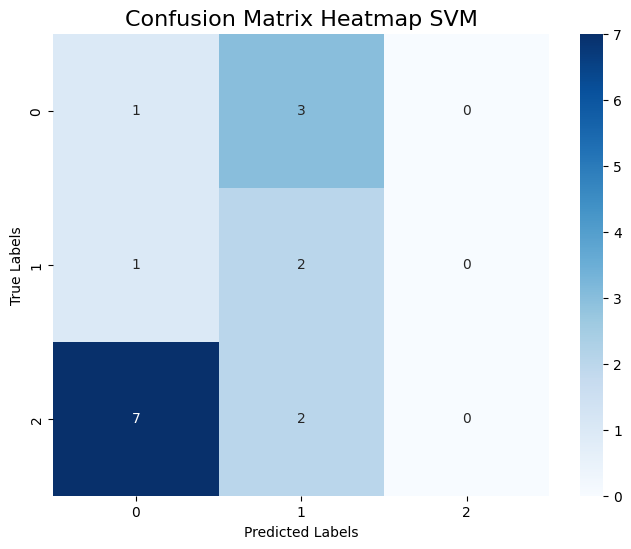

Classification Report:
              precision    recall  f1-score   support

           0       0.11      0.25      0.15         4
           1       0.29      0.67      0.40         3
           2       0.00      0.00      0.00         9

    accuracy                           0.19        16
   macro avg       0.13      0.31      0.18        16
weighted avg       0.08      0.19      0.11        16



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi hasil SVM
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy of SVM: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
confusion_matrix = sns.heatmap(tf.math.confusion_matrix(y_test, y_pred1), annot=True, fmt='d', cmap='Blues')
confusion_matrix.set_title('Confusion Matrix Heatmap SVM', fontsize=16)
confusion_matrix.set_xlabel('Predicted Labels')
confusion_matrix.set_ylabel('True Labels')
plt.show()

report = classification_report(y_test, y_pred1)
print("Classification Report:")
print(report)

Accuracy of Decision Tree: 1.00


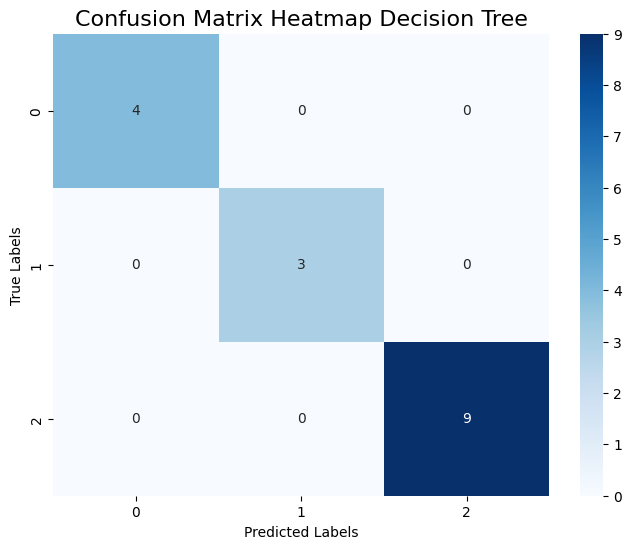

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         9

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16



In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi hasil SVM
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')

plt.figure(figsize=(8, 6))
confusion_matrix = sns.heatmap(tf.math.confusion_matrix(y_test, y_pred2), annot=True, fmt='d', cmap='Blues')
confusion_matrix.set_title('Confusion Matrix Heatmap Decision Tree', fontsize=16)
confusion_matrix.set_xlabel('Predicted Labels')
confusion_matrix.set_ylabel('True Labels')
plt.show()


report = classification_report(y_test, y_pred2)
print("Classification Report:")
print(report)

## KESIMPULAN

Model Decision Tree ini menunjukkan kinerja yang sangat baik. Hampir semua data diklasifikasikan dengan benar. Tidak ada kesalahan klasifikasi yang signifikan pada semua kelas. Terlihat ada beberapa kesalahan klasifikasi, terutama pada kelas 2 yang sering salah diklasifikasikan sebagai kelas 0.

Dalam kasus ini model ML Decision Tree dapat melakukan klasifikasi penjualn barang dengan sangat baik dibandingkan model SVM. Decision Tree menghasilkan akurasi mencapai 100%. Sedangkan SVM akurasinya hanya 19%.